# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/ds4e/EDA`
### Do Q1 and two other questions.

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.
2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.
3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?
4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?
5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?
6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 
7. Which giftors provide the most money, in total?

**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

In [173]:
air = pd.read_csv('./data/airbnb_hw.csv')
print(air.shape)
air.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


Question 2

There are 30478 observations and 13 variables. Some variables included are location of the airbnb, the property type, the reviews, or the price. 


In [174]:
# 3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? 
# For which kinds of properties are private rooms more common than renting the entire property?

pd.crosstab(air['Room Type'], air['Property Type'])

Property Type,Apartment,Bed & Breakfast,Boat,Bungalow,Cabin,Camper/RV,Castle,Chalet,Condominium,Dorm,House,Hut,Lighthouse,Loft,Other,Tent,Townhouse,Treehouse,Villa
Room Type,,,,,,,,,,,,,,,,,,,
Entire home/apt,15669,13,7,4,1,6,0,0,72,4,752,0,1,392,14,0,83,0,4
Private room,10748,155,1,0,1,1,1,1,22,16,1258,2,0,312,29,4,52,1,4
Shared room,685,12,0,0,0,0,0,0,0,11,80,0,0,49,4,0,1,3,0


Question 3: We can see the different property types that come with different rooms. We can see that the most property type available are apartments. Within apartments, most of them (15669) you can have the whole apartment to yourself, and 10748 of them are a private room. Houses seem to have more private rooms to the option of having the entire home. There are also many more unique property types, like lighthouse or boats, but these are few compared to apartments and houses.

In [175]:

air['Price'] = air['Price'].str.replace(",", "")
air['Price'].value_counts()
print(air['Price'].dtype)
air['Price'] = pd.to_numeric(air['Price']).astype('Int64') 
print(air['Price'].dtype)


object
Int64


<Axes: >

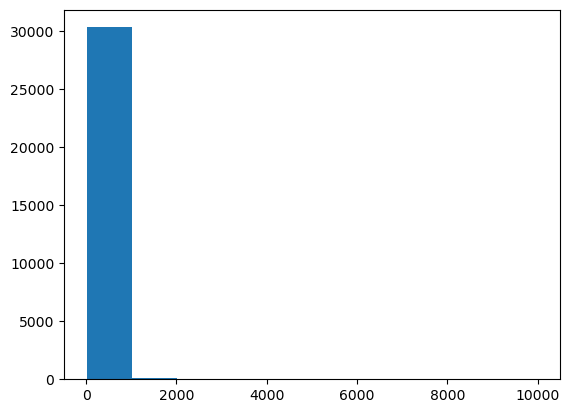

In [176]:
# 4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. 
air['Price'].hist(grid=False)


<Axes: ylabel='Density'>

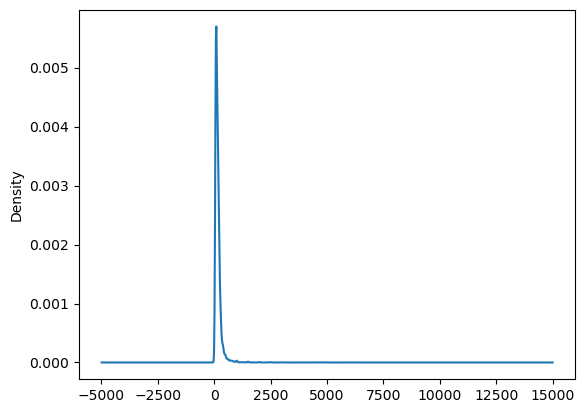

In [177]:
air['Price'].plot.density()

<Axes: >

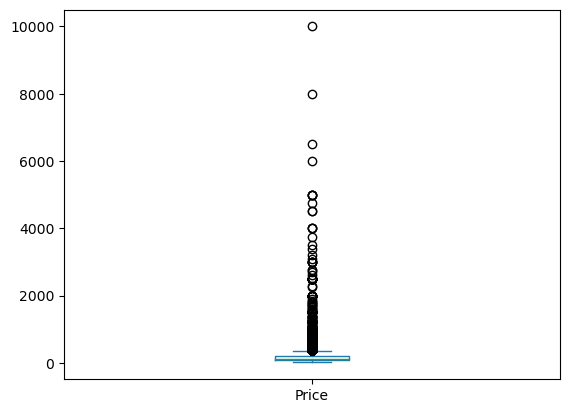

In [178]:
air['Price'].plot.box()

In [179]:
air['Price'].describe()

count       30478.0
mean     163.589737
std      197.785454
min            10.0
25%            80.0
50%           125.0
75%           195.0
max         10000.0
Name: Price, dtype: Float64

Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.

Yes, the data is badly scaled as most of the prices are small and the graphs have a hard time representing the larger values. 

<Axes: >

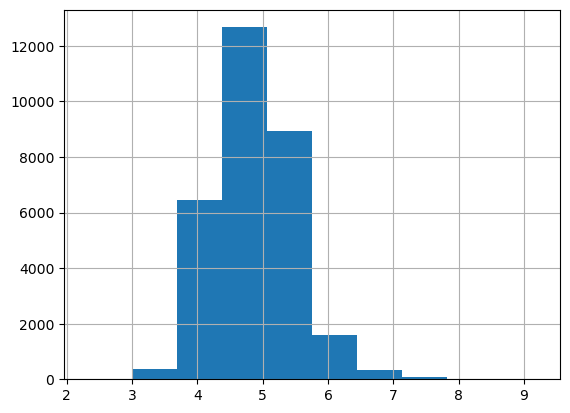

In [180]:
air['price_log'] = np.log(air['Price'])
air['price_log'].hist()

<Axes: ylabel='Density'>

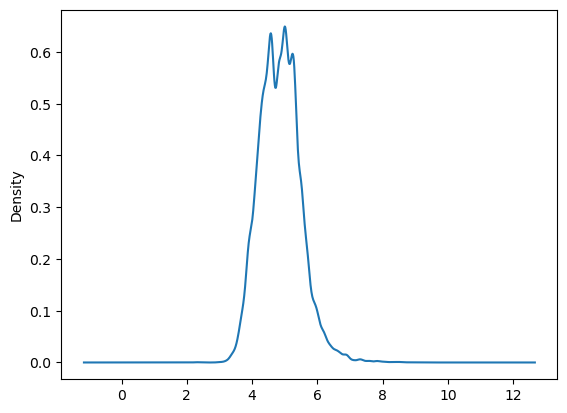

In [181]:
air['price_log'].plot.density()

<Axes: >

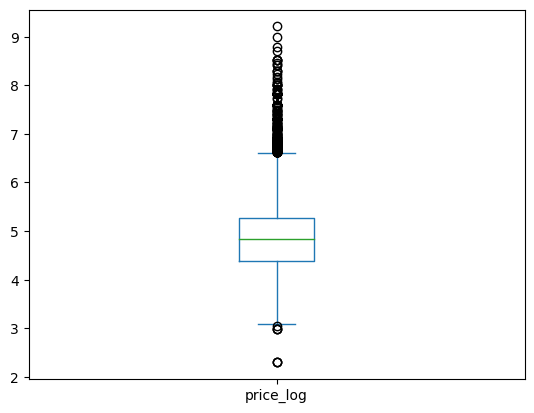

In [182]:
air['price_log'].plot.box()

In [183]:
air['price_log'].describe()

count     30478.0
mean     4.860495
std      0.627704
min      2.302585
25%      4.382027
50%      4.828314
75%         5.273
max       9.21034
Name: price_log, dtype: Float64

<Axes: xlabel='Beds', ylabel='price_log'>

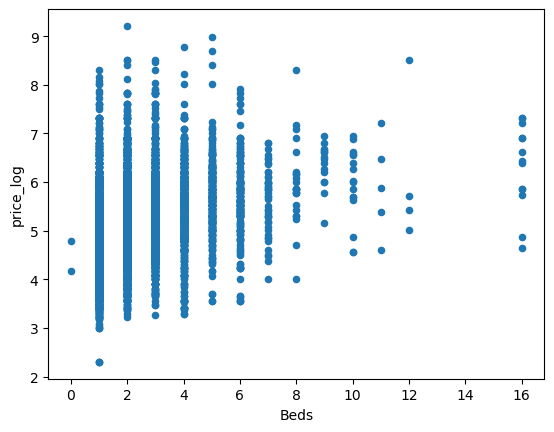

In [184]:
# 5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. 
# Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
 
air.plot.scatter(y='price_log',x='Beds')

# Here, it shows the relationship between the number of beds and price_log. It somewhat trends that as the number of beds increase, the prices increase.

In [185]:
air.groupby('Beds')['Price'].agg(['mean', 'std'])

# After grouping price based on beds, it seems like the average price increases as the number of beds increase. The standard deviation also increases
# as the number of beds increase. 

,mean,std
Beds,,
0.0,92.0,38.183766
1.0,127.67381,107.047827
2.0,199.061271,225.706318
3.0,268.1183,303.106942
4.0,315.332056,353.184402
5.0,411.5,672.610659
6.0,401.768362,417.018431
7.0,341.377778,220.116631
8.0,589.041667,793.054934


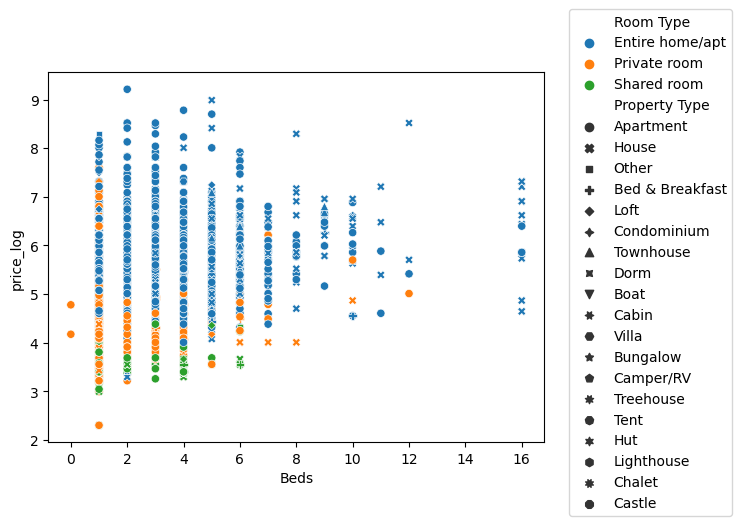

In [186]:
#6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. 

sns.scatterplot(data=air, x='Beds', y='price_log', hue='Room Type', style='Property Type')
plt.legend(loc=(1.05, -.2))

In [187]:
# What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. 
air.groupby(['Room Type', 'Property Type'])['Price'].describe()
# Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? 
# Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

count        mean          std    min  \
Room Type       Property Type                                              
Entire home/apt Apartment        15669.0  213.224839   218.097834   10.0   
                Bed & Breakfast     13.0  184.538462   119.814172   85.0   
                Boat                 7.0  158.428571    51.110524  100.0   
                Bungalow             4.0      150.75    46.464144   87.0   
                Cabin                1.0       250.0         <NA>  250.0   
                Camper/RV            6.0  114.333333   107.685963   45.0   
                Condominium         72.0  304.861111   266.197497   80.0   
                Dorm                 4.0       44.25    24.060687   30.0   
                House              752.0  297.263298   468.409428   27.0   
                Lighthouse           1.0        39.0         <NA>   39.0   
                Loft               392.0  330.510204   321.519721   55.0   
                Other               14.0  843.428571  1133.062271   66.0   
                Townhouse           83.0  280.783133   314.605252   66.0   
                Villa                4.0      529.75   650.963581  120.0   
Private room    Apartment        10748.0     92.7139     65.23705   10.0   
                Bed & Breakfast    155.0    97.16129    47.031971   32.0   
                Boat                 1.0       120.0         <NA>  120.0   
                Cabin                1.0        80.0         <NA>   80.0   
                Camper/RV            1.0        39.0         <NA>   39.0   
                Castle               1.0       150.0         <NA>  150.0   
                Chalet               1.0        99.0         <NA>   99.0   
                Condominium         22.0   98.590909    40.576394   46.0   
                Dorm                16.0     86.5625    40.738137   50.0   
                House             1258.0   77.750397     49.40265   25.0   
                Hut                  2.0        75.0    35.355339   50.0   
                Loft               312.0  108.057692   128.817912   39.0   
                Other               29.0  211.931034   235.404505   39.0   
                Tent                 4.0      126.25    94.989034   40.0   
                Townhouse           52.0   83.365385    30.578109   45.0   
                Treehouse            1.0        95.0         <NA>   95.0   
                Villa                4.0      126.25    71.107313   60.0   
Shared room     Apartment          685.0        79.2    67.720849   20.0   
                Bed & Breakfast     12.0  143.666667   245.328104   30.0   
                Dorm                11.0   73.181818    46.328864   30.0   
                House               80.0     77.4875   275.409936   10.0   
                Loft                49.0   78.816327    87.521824   30.0   
                Other                4.0      148.75   134.806961   70.0   
                Townhouse            1.0        95.0         <NA>   95.0   
                Treehouse            3.0  167.666667   114.788211   95.0   

                                   25%    50%     75%      max  
Room Type       Property Type                                   
Entire home/apt Apartment        135.0  175.0   235.0  10000.0  
                Bed & Breakfast  121.0  130.0   220.0    525.0  
                Boat             122.5  150.0   182.0    250.0  
                Bungalow         133.5  160.5  177.75    195.0  
                Cabin            250.0  250.0   250.0    250.0  
                Camper/RV         49.0   74.0   114.0    325.0  
                Condominium      155.0  200.0   375.0   1990.0  
                Dorm              30.0   33.5   47.75     80.0  
                House            126.5  195.0   300.0   8000.0  
                Lighthouse        39.0   39.0    39.0     39.0  
                Loft             160.0  225.0   379.0   3000.0  
                Other            140.0  300.0  1112.5   4000.0  
        

Question 5 Answers 

We can see the relationships between the variables room type, property type, and price. By looking at the plot, I can see that many of the listings are houses or apartments, and the more expensive listings are mostly houses. Most of the points are blue, which corresponds to them being the entire home/apt. 

The 'other' category within private room has the highest average price out of all the combinations of over $800. I am assuming that these listings are more unique finds, compared to more typical places to live. It is the same with std, but the runner up is villas, which has the second highest mean and std.

The median is a more reliable estimate for central tendency because the mean is easily swayed by the very large numbers in the dataset. The median shows more of the true middle in relation to prices that won't get swayed by the extremes.

/var/folders/y3/qpldbqrx2dn72lflj336s6l00000gn/T/ipykernel_32827/2993635381.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air['price_log'] = pd.to_numeric(air['price_log'], errors='coerce')
/var/folders/y3/qpldbqrx2dn72lflj336s6l00000gn/T/ipykernel_32827/2993635381.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  air['Beds'] = pd.to_numeric(air['Beds'], errors='coerce')


TypeError: reduction operation 'argmin' not allowed for this dtype

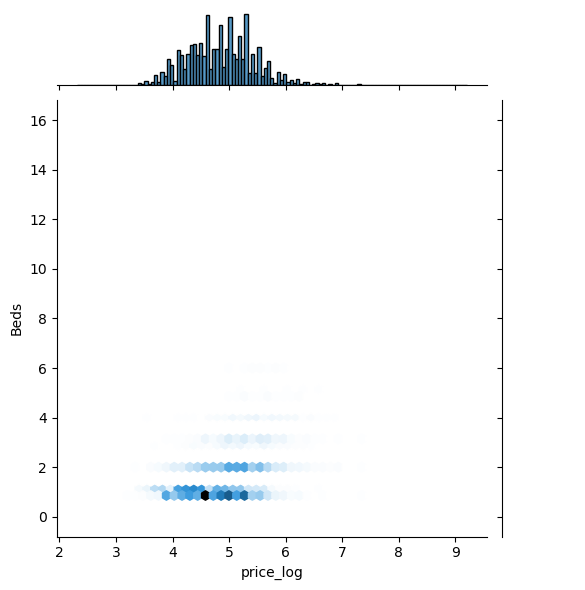

In [193]:
  # 7. We've looked a bit at this `price_log` and `Beds` scatterplot. 
  # Use seaborn to make a `jointplot` with `kind=hex`. 

air['price_log'] = pd.to_numeric(air['price_log'], errors='coerce')
air['Beds'] = pd.to_numeric(air['Beds'], errors='coerce')
sns.jointplot(data=air, x='price_log', y='Beds', kind='hex')

  # Where are the data actually distributed? 
  # The data is distributed mostly from price_log 3 to 7 with most values between 3 to 5. 

  # How does it affect the way you think about the plots in 5 and 6?
  # To me, this shows that the scatterplot may not be the best way to look at distributions that are grouped. I notice now that the points can easily overlap
  # which can be misleading and cause the viewer to miss out on a lot of information. 

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

In [ ]:
drill = pd.read_csv('./data/drilling_rigs.csv')
print(drill.shape)
print(drill.dtypes) 

drill['Active Well Service Rig Count (Number of Rigs)'] = drill['Active Well Service Rig Count (Number of Rigs)'].replace('Not Available', np.nan)
drill['Active Well Service Rig Count (Number of Rigs)'] = pd.to_numeric(drill['Active Well Service Rig Count (Number of Rigs)'])

(623, 10)
Month                                                                                          object
Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)                    int64
Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)                   int64
Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)                                     object
Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                                   object
Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)     object
Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)    object
Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)       object
Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)                      int64
Active Well Service Rig Count (Number of Rigs)                          

Question 1:

There are 623 observations and 10 variables

We can see that some of the numeric variables are objects, meaning they are being interpreted as strings. So, we must convert them to numeric. Before coercing them, we must make sure that the numbers are formated correctly, without things like commas and dollar signs. In this case, some values are noted as "Not Available", so I replaced them with np.nan before coercing to numeric.

In [ ]:
# Question 2
# To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
drill['Month'] = pd.to_datetime(drill['Month'], format='mixed')
drill.head()

,Month,"Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)","Crude Oil Rotary Rigs in Operation, Total (Number of Rigs)","Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Horizontal Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Directional Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Vertical Trajectory (Number of Rigs)","Crude Oil and Natural Gas Rotary Rigs in Operation, Total (Number of Rigs)",Active Well Service Rig Count (Number of Rigs)
0,1973-01-01,1120,99,Not Available,Not Available,Not Available,Not Available,Not Available,1219,1549.0
1,1973-02-01,1037,89,Not Available,Not Available,Not Available,Not Available,Not Available,1126,1677.0
2,1973-03-01,959,90,Not Available,Not Available,Not Available,Not Available,Not Available,1049,1805.0
3,1973-04-01,914,79,Not Available,Not Available,Not Available,Not Available,Not Available,993,1898.0
4,1973-05-01,974,72,Not Available,Not Available,Not Available,Not Available,Not Available,1046,1991.0


Text(0, 0.5, 'Active Well Service Rig Count(Number of Rigs)')

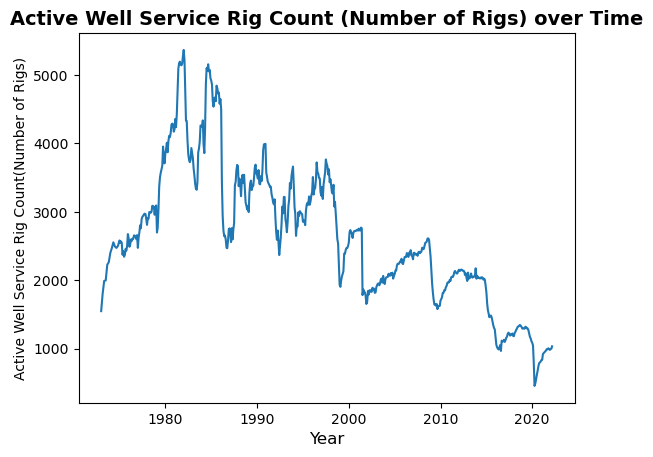

In [ ]:
# 3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. 
# Make a line plot of this time series. Describe what you see.

plt.plot(drill['Month'], drill['Active Well Service Rig Count (Number of Rigs)'])
plt.title('Active Well Service Rig Count (Number of Rigs) over Time', fontsize=14, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Active Well Service Rig Count(Number of Rigs)', fontsize=10)

This line plot shows that over time, the number of active rigs has decreased.

Text(0, 0.5, 'Change in Number of Rigs')

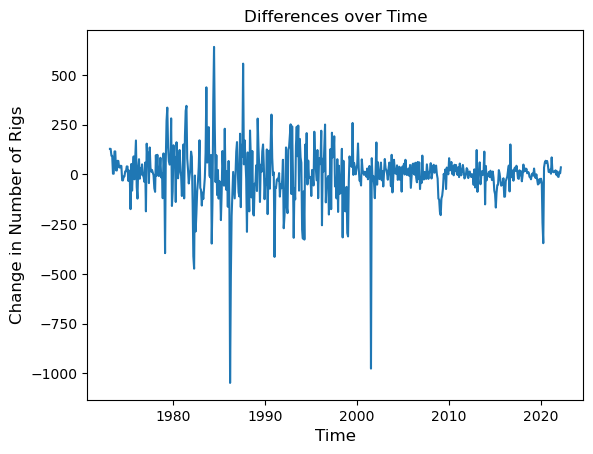

In [ ]:
# 4. Instead of levels, we want to look at change over time. 
# Compute the first difference of `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.

y = drill['Active Well Service Rig Count (Number of Rigs)'].to_numpy()
t = len(y)
diff = y[1:]-y[:(t-1)]

fig = sns.lineplot(x=drill['Month'][1:],y=diff)
fig.set(title='Differences over Time')
plt.xlabel('Time', fontsize=12)
plt.ylabel('Change in Number of Rigs', fontsize=12)


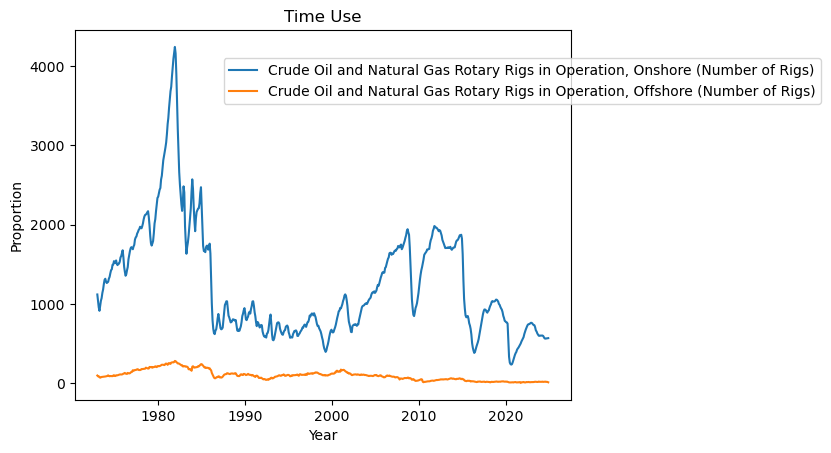

In [189]:
# 5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.

melt = drill.melt(id_vars = 'Month', value_vars=['Crude Oil and Natural Gas Rotary Rigs in Operation, Onshore (Number of Rigs)', 
                                                 'Crude Oil and Natural Gas Rotary Rigs in Operation, Offshore (Number of Rigs)'],
                                                 var_name='Rig Type', value_name='Rig Count')
# melt so that both onshore and offshore are on the same column

fig = sns.lineplot(data=melt, x='Month',y='Rig Count', hue='Rig Type')
fig.set(title='Time Use',xlabel='Year',ylabel='Proportion')
plt.legend(loc=(.3, .8))
      